# Global Warming Data  

Here we consider the annual data on temperature anomalies. In general, temperature appears to increase monotonically over the time period of 1850 to 2015 ([Wu et al., 2001](../references.md#8); [Tibshirani et al., 2011](../references.md#5)). This monotonicity can be imposed on the coeffcient estimates using the constrained lasso with the inequality constraint matrix:

$$\begin{split}
& \text{minimize} \hspace{1em} \frac{1}{2} ||\boldsymbol{y}-\boldsymbol{X\beta}||^2_2 + \rho||\beta||_1 \\
& \text{ subject to} \hspace{1em} \boldsymbol{C\beta} \leq \boldsymbol{d} 
\end{split}$$

where 

$$\boldsymbol{C} = \begin{pmatrix} 
1 & -1 &     &    	  &       & 	& \\
  & 1  & -1  &    	  &  		&	& \\
  &    &  1  & -1 	  & 		& 	& \\
  &		&		& \ddots & \ddots &  & \\
  &		&		&		 &			& 1 & -1 \\
\end{pmatrix}$$

and $\boldsymbol{d} = \boldsymbol{0}.$

In [1]:
using ConstrainedLasso 


Use "abstract type Loss end" instead.


First we load and organize the data. 

In [2]:
warming = readcsv(joinpath(Pkg.dir("ConstrainedLasso"),"docs/src/demo/misc/warming.csv"), header=true)[1]
year = warming[:, 1]
y    = warming[:, 2]
hcat(year, y)

166×2 Array{Float64,2}:
 1850.0  -0.375
 1851.0  -0.223
 1852.0  -0.224
 1853.0  -0.271
 1854.0  -0.246
 1855.0  -0.271
 1856.0  -0.352
 1857.0  -0.46 
 1858.0  -0.466
 1859.0  -0.286
 1860.0  -0.346
 1861.0  -0.409
 1862.0  -0.522
    ⋮          
 2004.0   0.45 
 2005.0   0.544
 2006.0   0.505
 2007.0   0.493
 2008.0   0.395
 2009.0   0.506
 2010.0   0.559
 2011.0   0.422
 2012.0   0.47 
 2013.0   0.499
 2014.0   0.567
 2015.0   0.746

In [3]:
n = p = size(y, 1)
X = eye(n)

166×166 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

Now we define inequality constraints as specified earlier. 

In [4]:
C = [eye(p-1) zeros(p-1, 1)] - [zeros(p-1, 1) eye(p-1)]

165×166 Array{Float64,2}:
 1.0  -1.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
 0.0   1.0  -1.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
 0.0   0.0   1.0  -1.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
 0.0   0.0   0.0   1.0  -1.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
 0.0   0.0   0.0   0.0   1.0  -1.0      0.0   0.0   0.0   0.0   0.0   0.0
 0.0   0.0   0.0   0.0   0.0   1.0  …   0.0   0.0   0.0   0.0   0.0   0.0
 0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
 0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
 0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
 0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
 0.0   0.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
 0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
 0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
 ⋮          

In [5]:
d = zeros(size(C, 1))

165-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

Then we estimate constrained lasso solution path. 

In [6]:
β̂path, ρpath, = lsq_classopath(X, y; Aineq = C, bineq = d); 

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] isnan(::Array{Float64,1}) at ./deprecated.jl:57
 [3] populate_solution!(::ECOS.ECOSMathProgModel, ::Convex.Problem, ::Dict{UInt64,Tuple{Int64,Int64}}, ::Array{Convex.ConicConstr,1}) at /Users/juhyun-kim/.julia/v0.6/Convex/src/solution.jl:118
 [4] #solve!#25(::Bool, ::Bool, ::Bool, ::Function, ::Convex.Problem) at /Users/juhyun-kim/.julia/v0.6/Convex/src/solution.jl:38
 [5] #solve!#24(::Array{Any,1}, ::Function, ::Convex.Problem, ::ECOS.ECOSSolver) at /Users/juhyun-kim/.julia/v0.6/Convex/src/solution.jl:13
 [6] #find_ρmax#61(::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Bool,1}, ::ECOS.ECOSSolver, ::Function, ::Array{Float64,2}, ::Array{Float64,1}) at /Users/juhyun-kim/.julia/v0.6/ConstrainedLasso/src/classopath.jl:690
 [7] (::ConstrainedLasso.#kw##find_ρmax)(::Array{Any,1}, ::ConstrainedLasso.#find_ρmax, ::Array{Float64,2}, ::Array{Float64,1}) at ./<missing>:0
 [8] #lsq_cla

In [7]:
β̂path

166×198 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0       …  -0.323225  -0.366     -0.375   
 0.0  0.0  0.0  0.0  0.0  0.0          -0.294082  -0.336857  -0.345857
 0.0  0.0  0.0  0.0  0.0  0.0          -0.294082  -0.336857  -0.345857
 0.0  0.0  0.0  0.0  0.0  0.0          -0.294082  -0.336857  -0.345857
 0.0  0.0  0.0  0.0  0.0  0.0          -0.294082  -0.336857  -0.345857
 0.0  0.0  0.0  0.0  0.0  0.0       …  -0.294082  -0.336857  -0.345857
 0.0  0.0  0.0  0.0  0.0  0.0          -0.294082  -0.336857  -0.345857
 0.0  0.0  0.0  0.0  0.0  0.0          -0.294082  -0.336857  -0.345857
 0.0  0.0  0.0  0.0  0.0  0.0          -0.294082  -0.336857  -0.345857
 0.0  0.0  0.0  0.0  0.0  0.0          -0.294082  -0.336857  -0.345857
 0.0  0.0  0.0  0.0  0.0  0.0       …  -0.294082  -0.336857  -0.345857
 0.0  0.0  0.0  0.0  0.0  0.0          -0.294082  -0.336857  -0.345857
 0.0  0.0  0.0  0.0  0.0  0.0          -0.294082  -0.336857  -0.345857
 ⋮                        ⋮         ⋱   ⋮          

In this formulation, isotonic regression is a special case of the constrained lasso with $\rho=0.$
Below, `monoreg` is coefficient estimates obtained using isotonic regression. 

In [8]:
monoreg = readdlm(joinpath(Pkg.dir("ConstrainedLasso"),"docs/src/demo/misc/monoreg.txt"))

166×1 Array{Float64,2}:
 -0.375   
 -0.345857
 -0.345857
 -0.345857
 -0.345857
 -0.345857
 -0.345857
 -0.345857
 -0.345857
 -0.345857
 -0.345857
 -0.345857
 -0.345857
  ⋮       
  0.484571
  0.484571
  0.484571
  0.484571
  0.484571
  0.48925 
  0.48925 
  0.48925 
  0.48925 
  0.499   
  0.567   
  0.746   

Now let's compare estimates by obtaining the largest absolute difference between isotonic regression constrained lasso fit. 

In [9]:
maximum(abs.(monoreg - β̂path[:, end]))

1.2212453270876722e-15

Below is a figure that plots the constrained lasso fit at $\rho = 0$ with the estimates using isotonic regression.


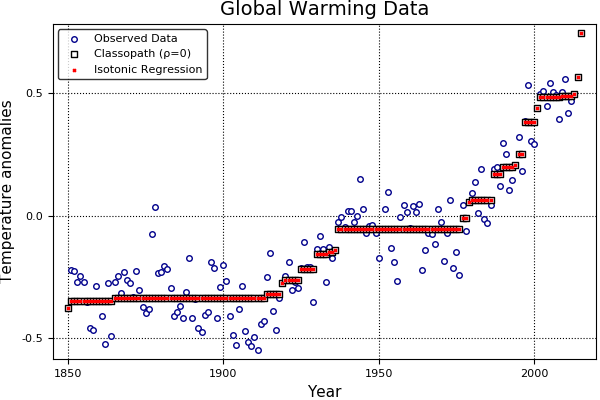

In [10]:
using Plots; pyplot(); 
scatter(year, y, label="Observed Data", markerstrokecolor="darkblue", 
        markercolor="white")
scatter!(year, β̂path[:, end], label="Classopath (ρ=0)", 
        markerstrokecolor="black", marker=:rect, markercolor="white")
scatter!(year, monoreg, label="Isotonic Regression", marker=:x,
        markercolor="red", markersize=2)
xaxis!("Year") 
yaxis!("Temperature anomalies")
title!("Global Warming Data")

In [11]:
savefig("misc/warming.svg")

![](misc/warming.svg)

*Follow the [link](https://github.com/Hua-Zhou/ConstrainedLasso.jl/blob/master/docs/src/demo/warming.ipynb) to access the .ipynb file of this page.*